In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [113]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [114]:
# Dropping the Cabin feature since the column is missing 77% of its values
missing_v = train["Cabin"].isna().sum()
total_v = 891
percent = missing_v*100/total_v
percent

77.10437710437711

In [115]:
#  Droppping "redundant" features
def clean(data):
    data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
    return data


In [116]:
#Re-defining the df with which we will work with
train_drp = clean(train)
test_drp = clean(test)

In [117]:
train_drp.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [118]:
# Checking for empty rows within each columns

In [119]:
def count_na (data):
    list_miss = []
    list_percent = []
    cols = data.columns
    for col in cols:
        missing_values = data[col].isna().sum()
        list_miss.append(missing_values)
        percent = missing_values*100/len(data[col])
        list_percent.append(round(percent, 2))
    df_miss = pd.DataFrame(list_miss).T
    df_miss.columns = data.columns
    df_percent = pd.DataFrame(list_percent).T
    df_percent.columns = data.columns
    df_miss.loc[1] = df_percent.loc[0]
    df_miss.index = ["Total", "Percent"]
    return df_miss


In [155]:
train_na = count_na(train_drp)
test_na = count_na(test_drp)



In [156]:
train_na

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Total,0.0,0.0,0.0,177.00,0.0,0.0,0.0,2.00
Percent,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.22


In [157]:
test_na

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Total,0.0,0.0,86.00,0.0,0.0,1.00,0.0
Percent,0.0,0.0,20.57,0.0,0.0,0.24,0.0


Only the columns Age and Fare seem to have missing values on both our trainning and testing data sets.
However, it appears that the missing values for Fare are small enough (Train: 0.22% | Test: 0.24 %) that 
the best course of action would probably be to leave them as is. 

On the other hand, our Age columns have a large number of missing values that should be taken care of 
(Train: 19.87% | Test: 20.57). 

In order to determine the procedure by which we will fill in these values we must first see if there is
any pattern to the missing data or if it is completly at random.
If the missing values are spread randomly throughout the sample we could make use of the sample average
if the distribution follows a normal/Gaussian distribution. Else, it would probably better to replace 
these random missing values through the use of the median.

However, if the missing values are not at random, more sofisticate approaches should be used to interporlate
the date more accurately.

In order to check if these missing values are at random or not we will examin the distribution of the other
column's values based on wether they belong to the null subsampling or non-null subsample.

In [122]:
# We divide our samples (Training and Test) into its respective subsamples (Null and Not Null)
train_null = train_drp[train_drp["Age"].isna()]
train_not_null = train_drp[train_drp["Age"].notnull()]

test_null = test_drp[test_drp["Age"].isna()]
test_not_null = test_drp[test_drp["Age"].notnull()]

In [124]:
# We create a function that will enable the comparison of these subsamples based on their
# distribution as percentages of each column.
def percent_n(data_col):
    Total = data_col.groupby(data_col).count()
    Percent = data_col.groupby(data_col).count()
    for i in Total.index:    
        Percent[i] = round(Percent[i]*100/Total.sum(), 2)
    df = pd.DataFrame({'Total': Total, 'Percent': Percent}, columns=['Total', 'Percent'])
    return df

# Survival

In [260]:
# Examining Survival distribution between Train_Null and Train_Not_Null subsamples.
# Note: Test is not examined since it does not contain this particular column.
p_null_s_Age = percent_n(train_null["Survived"])
p_notnull_s_Age = percent_n(train_not_null["Survived"])

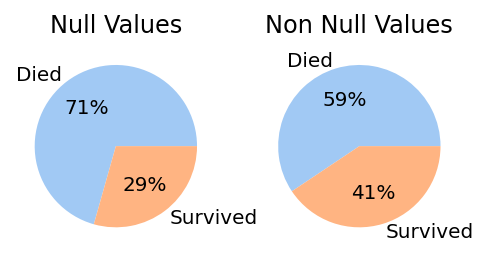

In [126]:
# Plotting Results
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


## Plotting using seaborn


fig = plt.figure(figsize=(4,3), dpi=144)
ax = fig.add_subplot(121)
ax1 = plt.pie(p_null_s_Age["Total"], labels = ['Died', 'Survived'], colors = colors, autopct='%.0f%%')
ax.set_title("Null Values")

ax = fig.add_subplot(122)
ax2 = plt.pie(p_notnull_s_Age["Total"], labels = ['Died', 'Survived'], colors = colors, autopct='%.0f%%')
ax.set_title("Non Null Values")
plt.show()

The distribution percentages Survived/Died seem to differ between null and non null subsamples.
One would expect them to be similar if the error was random, but it may be systematic.
URL of interest: 
https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/
https://blogs.oracle.com/ai-and-datascience/post/3-methods-to-handle-missing-data
    - Random Forest
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/
    The cases of MNAR data are problematic. The only way to obtain an unbiased estimate of the 
    parameters in such a case is to model the missing data. The model may then be incorporated 
    into a more complex one for estimating the missing values.
    - Regression imputation

https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=There%20are%202%20primary%20ways,Imputing%20the%20Missing%20Values

We proceed examining the rest of the columns to check if this pattern of apperent non-randomness is also
present within them.

# Sex

In [238]:
# Train Data
p_null_s_Sex_tr = percent_n(train_null["Sex"])
p_notnull_s_Sex_tr = percent_n(train_not_null["Sex"])

# Test Data
p_null_s_Sex_tst = percent_n(test_null["Sex"])
p_notnull_s_Sex_tst = percent_n(test_not_null["Sex"])

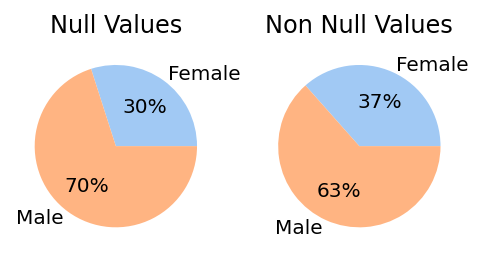

In [239]:
# Plotting Train Data
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


## Plotting using seaborn
fig = plt.figure(figsize=(4,3), dpi=144)
ax = fig.add_subplot(121)
ax1 = plt.pie(p_null_s_Sex_tr["Total"], labels = ['Female', 'Male'], colors = colors, autopct='%.0f%%')
ax.set_title("Null Values")

ax = fig.add_subplot(122)
ax2 = plt.pie(p_notnull_s_Sex_tr["Total"], labels = ['Female', 'Male'], colors = colors, autopct='%.0f%%')
ax.set_title("Non Null Values")

plt.show()

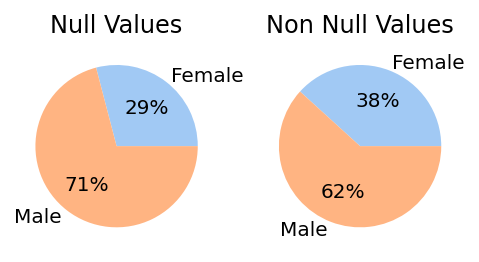

In [240]:
# Plotting Test Data
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


## Plotting using seaborn
fig = plt.figure(figsize=(4,3), dpi=144)
ax = fig.add_subplot(121)
ax1 = plt.pie(p_null_s_Sex_tst["Total"], labels = ['Female', 'Male'], colors = colors, autopct='%.0f%%')
ax.set_title("Null Values")

ax = fig.add_subplot(122)
ax2 = plt.pie(p_notnull_s_Sex_tst["Total"], labels = ['Female', 'Male'], colors = colors, autopct='%.0f%%')
ax.set_title("Non Null Values")
plt.show()

In [249]:
# Intra Subsample (Null x Not Null) Comparison
Intra_dif_tr = p_null_s_Sex_tr["Percent"] - p_notnull_s_Sex_tr["Percent"]
Intra_dif_tst = p_null_s_Sex_tst["Percent"] - p_notnull_s_Sex_tst["Percent"]

# Inter Subsample (Train x Test) Comparisons
Inter_dif_null = p_null_s_Sex_tr["Percent"] - p_null_s_Sex_tst["Percent"]
Inter_dif_not_null = p_notnull_s_Sex_tr["Percent"] - p_notnull_s_Sex_tst["Percent"]

# Creating a joint DF for better comparison
df = pd.DataFrame(Intra_dif_tr)
df.columns = ["Intra_dif_tr"]
df["Intra_dif_tst"] = pd.DataFrame(Intra_dif_tst)
df["Inter_dif_null"] = pd.DataFrame(Inter_dif_null)
df["Inter_dif_notnull"] = pd.DataFrame(Inter_dif_not_null)
df

,Intra_dif_tr,Intra_dif_tst,Inter_dif_null,Inter_dif_notnull
Sex,,,,
female,-6.61,-9.18,0.87,-1.7
male,6.61,9.18,-0.87,1.7


Distribution seems to also differ between subsamples with a 6.61% (Train) and a 9.18% (Test) difference.
This difference drops when comparing same type subsamples across samples (Train[Null]xTest[Null] & 
Train[NotNull]xTest[NotNull]) falling to 0.87% and 1.7% respectively. This hints at the possibility
of greater similarity between the test and train subsamples. This would mean that a multivariate approach
could use both samples in order to interpolate the missing Age values. 
If other columns exhibit similar behavior, with respect to uneven distribution of null values across
features(columns) we could then incorporate them into our multivariate interpolation. 





# Number of Siblings

In [250]:
# Taining data sample
p_null_s_SbSp_tr = percent_n(train_null["SibSp"])
p_notnull_s_SbSp_tr = percent_n(train_not_null["SibSp"])

# Testing data
p_null_s_SbSp_tst = percent_n(test_null["SibSp"])
p_notnull_s_SbSp_tst = percent_n(test_not_null["SibSp"])

# Intra Subsample (Null x Not Null) Comparison
Intra_dif_tr = p_null_s_SbSp_tr["Percent"].subtract(p_notnull_s_SbSp_tr["Percent"], fill_value=0)
Intra_dif_tst = p_null_s_SbSp_tst["Percent"].subtract(p_notnull_s_SbSp_tst["Percent"], fill_value=0)

# Inter Subsample (Train x Test) Comparisons
Inter_dif_null= p_null_s_SbSp_tr["Percent"].subtract(p_null_s_SbSp_tst["Percent"], fill_value=0)
Inter_dif_not_null = p_notnull_s_SbSp_tr["Percent"].subtract(p_notnull_s_SbSp_tst["Percent"], fill_value=0)

# Creating a joint DF for better comparison
df = pd.DataFrame(Intra_dif_tr.reindex([0,1,2,3,4,5,6,7,8]))
df.columns = ["Intra_dif_tr"]
df["Intra_dif_tst"] = pd.DataFrame(Intra_dif_tst)
df["Inter_dif_null"] = pd.DataFrame(Inter_dif_null)
df["Inter_dif_not_null"] = pd.DataFrame(Inter_dif_not_null)
df

,Intra_dif_tr,Intra_dif_tst,Inter_dif_null,Inter_dif_not_null
SibSp,,,,
0,11.43,15.77,-2.83,1.51
1,-10.94,-14.10,-0.43,-3.59
2,-1.81,0.18,-1.80,0.19
3,0.58,-1.20,2.26,0.48
4,-2.52,-1.20,NaN,1.32
5,-0.70,-0.30,NaN,0.40
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,3.95,0.86,2.79,-0.30


Similar results as with our Sex column. 

# Parch

In [251]:
# Train Data
p_null_s_Parch_tr = percent_n(train_null["Parch"])
p_notnull_s_Parch_tr = percent_n(train_not_null["Parch"])

# Test Data
p_null_s_Parch_tst = percent_n(test_null["Parch"])
p_notnull_s_Parch_tst = percent_n(test_not_null["Parch"])

# Intra Subsample (Null x Not Null) Comparison
Intra_dif_tr = p_null_s_Parch_tr["Percent"].subtract(p_notnull_s_Parch_tr["Percent"], fill_value=0)
Intra_dif_tst = p_null_s_Parch_tst["Percent"].subtract(p_notnull_s_Parch_tst["Percent"], fill_value=0)

# Inter Subsample (Train x Test) Comparisons
Inter_dif_null = p_null_s_Parch_tr["Percent"].subtract(p_null_s_Parch_tst["Percent"], fill_value=0)
Inter_dif_not_null = p_notnull_s_Parch_tr["Percent"].subtract(p_notnull_s_Parch_tst["Percent"], fill_value=0)

# Creating a joint DF for better comparison
df = pd.DataFrame(Intra_dif_tr.reindex([0,1,2,3,4,5,6,7,8,9]))
df.columns = ["Intra_dif_tr"]
df["Intra_dif_tst"] = pd.DataFrame(Intra_dif_tst)
df["Inter_dif_null"] = pd.DataFrame(Inter_dif_null)
df["Inter_dif_not_null"] = pd.DataFrame(Inter_dif_not_null)
df

,Intra_dif_tr,Intra_dif_tst,Inter_dif_null,Inter_dif_not_null
Parch,,,,
0,15.73,15.13,-0.83,-1.43
1,-10.89,-12.73,2.19,0.35
2,-2.74,-4.08,2.13,0.79
3,-0.70,-0.90,NaN,-0.20
4,-0.56,0.86,-1.16,0.26
5,-0.70,-0.30,NaN,0.40
6,-0.14,-0.30,NaN,-0.16
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN


Notes on the resulting df

# Fare

In [333]:
# Grouping fare prices by intervals of 10
def fare_price(data):
    data["Fare_Price"] = pd.cut(x=data['Fare'], bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230])
    df_fp = data["Fare_Price"].groupby(data["Fare_Price"]).count()
    df_fp = pd.DataFrame(df_fp)
    df_fp.columns = ["Count"]
    return df_fp

In [334]:
# Obtaining the proportions of our distribution
def fare_percent(data):
    from cmath import nan
    df_fp = fare_price(data)
    df_fp["Percent"] = nan
    for i in df_fp.index:
        df_fp["Percent"][i] = round(df_fp["Count"][i]*100/df_fp["Count"].sum(), 2)
    return df_fp


In [336]:
# Train Data
p_null_s_Fare_tr = fare_percent(train_null)
p_notnull_s_Fare_tr = fare_percent(train_not_null)

# Test Data
p_null_s_Fare_tst = fare_percent(test_null)
p_notnull_s_Fare_tst = fare_percent(test_not_null)

# Intra Subsample (Null x Not Null) Comparison
Intra_dif_tr = p_null_s_Fare_tr["Percent"].subtract(p_notnull_s_Fare_tr["Percent"])
Intra_dif_tst = p_null_s_Fare_tst["Percent"].subtract(p_notnull_s_Fare_tst["Percent"])

# Inter Subsample (Train x Test) Comparisons
Inter_dif_null = p_null_s_Fare_tr["Percent"].subtract(p_null_s_Fare_tst["Percent"])
Inter_dif_not_null = p_notnull_s_Fare_tr["Percent"].subtract(p_notnull_s_Fare_tst["Percent"])

# Creating a joint DF for better comparison
df = pd.DataFrame(Intra_dif_tr)
df.columns = ["Intra_dif_tr"]
df["Intra_dif_tst"] = pd.DataFrame(Intra_dif_tst)
df["Inter_dif_null"] = pd.DataFrame(Inter_dif_null)
df["Inter_dif_not_null"] = pd.DataFrame(Inter_dif_not_null)
df

C:\Users\chiaw\AppData\Local\Temp\ipykernel_10556\1923579407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Fare_Price"] = pd.cut(x=data['Fare'], bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230])
C:\Users\chiaw\AppData\Local\Temp\ipykernel_10556\4226561001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fp["Percent"][i] = round(df_fp["Count"][i]*100/df_fp["Count"].sum(), 2)
C:\Users\chiaw\AppData\Local\Temp\ipykernel_10556\1923579407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,Intra_dif_tr,Intra_dif_tst,Inter_dif_null,Inter_dif_not_null
Fare_Price,,,,
"(0, 10]",21.54,29.72,-6.74,1.44
"(10, 20]",-8.07,-6.21,-1.09,0.77
"(20, 30]",-4.22,-2.78,-2.27,-0.83
"(30, 40]",-3.19,-3.57,1.79,1.41
"(40, 50]",-0.83,-2.49,1.18,-0.48
"(50, 60]",-0.31,-2.63,1.79,-0.53
"(60, 70]",2.70,1.04,0.61,-1.05
"(70, 80]",-3.72,-3.12,0.59,1.19
"(80, 90]",-0.98,-2.49,1.18,-0.33


In [ ]:
Fare_Price = train_not_null["Fare_Price"].groupby(train_not_null["Fare_Price"]).count()
df_Fare_Price = pd.DataFrame(Fare_Price)
df_Fare_Price.columns = ["Count"]
sns.barplot(df_Fare_Price, x=df_Fare_Price.index, y=df_Fare_Price["Count"])
plt.xticks(rotation=-45)

# Class

In [ ]:
# How does the not null table differ from the null table


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 [Text(0, 0, '0.42'),
  Text(1, 0, '0.67'),
  Text(2, 0, '0.75'),
  Text(3, 0, '0.83'),
  Text(4, 0, '0.92'),
  Text(5, 0, '1.0'),
  Text(6, 0, '2.0'),
  Text(7, 0, '3.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '5.0'),
  Text(10, 0, '6.0'),
  Text(11, 0, '7.0'),
  Text(12, 0, '8.0'),
  Text(13, 0, '9.0'),
  Text(14, 0, '10.0'),
  Text(15, 0, '11.0'),
  Text(16, 0, '12.0'),
  Text(17, 0, '13.0'),
  Text(18, 0, '14.0'),
  Text(19, 0, '14.5'),
  Text(20, 0, '15.0'),
  Text(21, 0, '16.0'),
  Text(22, 0, '17.0'),
  Text(23, 0, '18.0'),
  Text(24, 0, '19.0'),
  Text(25, 0, '20.0'),
  Text(26, 0, '20.5

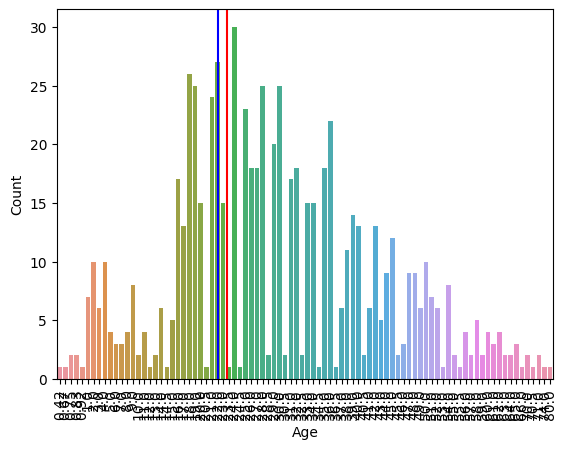

In [73]:
# Solving missing values for ["Age"]
Age_Distribution = train_drp["Age"].groupby(train_drp["Age"]).count()
df = pd.DataFrame(Age_Distribution)
df.columns = ["Count"]
sns.barplot(df, x=df.index, y=df["Count"])
plt.axvline(x=train_drp["Age"].mean(), color='Red')
plt.axvline(x=train_drp["Age"].median(), color='Blue')
plt.xticks(rotation=90)

In [74]:
def age_group(df):
    df["Age_Group"] = pd.cut(x=df['Age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
    return df

In [75]:
age_group(train_drp)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
0,0,3,male,22.0,1,0,7.2500,S,"(20.0, 25.0]"
1,1,1,female,38.0,1,0,71.2833,C,"(35.0, 40.0]"
2,1,3,female,26.0,0,0,7.9250,S,"(25.0, 30.0]"
3,1,1,female,35.0,1,0,53.1000,S,"(30.0, 35.0]"
4,0,3,male,35.0,0,0,8.0500,S,"(30.0, 35.0]"
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,"(25.0, 30.0]"
887,1,1,female,19.0,0,0,30.0000,S,"(15.0, 20.0]"
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,"(25.0, 30.0]"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '(0, 5]'),
  Text(1, 0, '(5, 10]'),
  Text(2, 0, '(10, 15]'),
  Text(3, 0, '(15, 20]'),
  Text(4, 0, '(20, 25]'),
  Text(5, 0, '(25, 30]'),
  Text(6, 0, '(30, 35]'),
  Text(7, 0, '(35, 40]'),
  Text(8, 0, '(40, 45]'),
  Text(9, 0, '(45, 50]'),
  Text(10, 0, '(50, 55]'),
  Text(11, 0, '(55, 60]'),
  Text(12, 0, '(60, 65]'),
  Text(13, 0, '(65, 70]'),
  Text(14, 0, '(70, 75]'),
  Text(15, 0, '(75, 80]')])

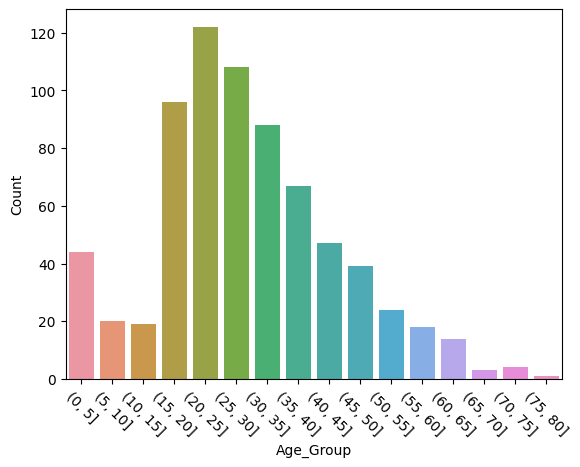

In [76]:
Age_Group = train_drp["Age_Group"].groupby(train_drp["Age_Group"]).count()
df_Age_Group = pd.DataFrame(Age_Group)
df_Age_Group.columns = ["Count"]
sns.barplot(df_Age_Group, x=df_Age_Group.index, y=df_Age_Group["Count"])
plt.xticks(rotation=-45)


In [150]:
# Testing for Normality: Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(train_drp['Age_Group'].dropna())
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


TypeError: unsupported operand type(s) for +: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

In [152]:
def age_group(df):
    df["Age_Group_Num"] = pd.cut(x=df['Age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], labels = False)
    return df

In [132]:
age_group(train_drp)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group,Age_Group_Num
0,0,3,male,22.0,1,0,7.2500,S,"(20.0, 25.0]",4.0
1,1,1,female,38.0,1,0,71.2833,C,"(35.0, 40.0]",7.0
2,1,3,female,26.0,0,0,7.9250,S,"(25.0, 30.0]",5.0
3,1,1,female,35.0,1,0,53.1000,S,"(30.0, 35.0]",6.0
4,0,3,male,35.0,0,0,8.0500,S,"(30.0, 35.0]",6.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,"(25.0, 30.0]",5.0
887,1,1,female,19.0,0,0,30.0000,S,"(15.0, 20.0]",3.0
888,0,3,female,NaN,1,2,23.4500,S,NaN,NaN
889,1,1,male,26.0,0,0,30.0000,C,"(25.0, 30.0]",5.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0')])

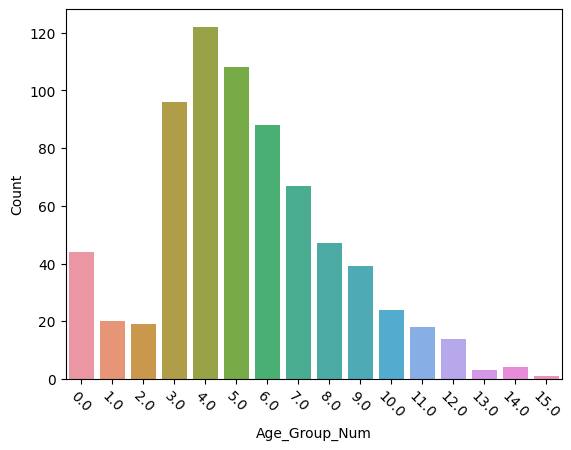

In [153]:
Age_Group_Num = train_drp["Age_Group_Num"].groupby(train_drp["Age_Group_Num"]).count()
df_Age_Group_Num = pd.DataFrame(Age_Group_Num)
df_Age_Group_Num.columns = ["Count"]
sns.barplot(df_Age_Group_Num, x=df_Age_Group_Num.index, y=df_Age_Group_Num["Count"])
plt.xticks(rotation=-45)

In [154]:
# Testing for Normality: Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(train_drp['Age_Group_Num'].dropna())
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.968, p=0.000

Probably not Gaussian


In [155]:
# Testing for Normality: D'Agnostino's K-squared test
# Testing for normality based on skewness and kurtosis

from scipy.stats import normaltest

stat, p = normaltest(train_drp["Age_Group_Num"].dropna())
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=20.447, p=0.000

Probably not Gaussian


In [156]:
# Testing for Normality: Abdersib-Darling Normality Test\

from scipy.stats import anderson

result = anderson(train_drp["Age_Group_Num"].dropna())
print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
    if result.statistic < crit_val:
        print(f'Probably Gaussian : {crit_val} critical value at {sig_lev} level of significance')
    else:
        print(f'Probably not Gaussian : {crit_val} critical value at {sig_lev} level of significance')

stat=7.750
Probably not Gaussian : 0.573 critical value at 15.0 level of significance
Probably not Gaussian : 0.652 critical value at 10.0 level of significance
Probably not Gaussian : 0.783 critical value at 5.0 level of significance
Probably not Gaussian : 0.913 critical value at 2.5 level of significance
Probably not Gaussian : 1.086 critical value at 1.0 level of significance


In [158]:
# Our distribution is not a Normal/Gaussian distribution therefore we will use the median value of age 
# instead of the mean to replace none values.
train_drp['Age'].median()


28.0